# **0. Información del Dataset**

---

*   Información: \\
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

*   Información Adicional: \\
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. \\
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. \\
Description: Product (item) name. Nominal. \\
Quantity: The quantities of each product (item) per transaction. Numeric.	\\
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. \\
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). \\
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. \\
Country: Country name. Nominal. The name of the country where a customer resides.


# **1. Importar Librerías**

---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl as op
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **2. Exploración de Datos**

---

## A. Cargar Datos

In [ ]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name = 0)
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## B. Información de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df.describe(include = "object")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


## C. Inspeccionar Parámetro "Customer ID"

Eliminar datos sin un ID de comprador

In [ ]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


## D. Inspeccionar Parámetro "Quantity"

In [ ]:
df[df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


{'whiskers': [<matplotlib.lines.Line2D at 0x7c162bb3da50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1670823ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c162bb3e740>],
 'medians': [<matplotlib.lines.Line2D at 0x7c1670823a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c162c25b520>],
 'means': []}

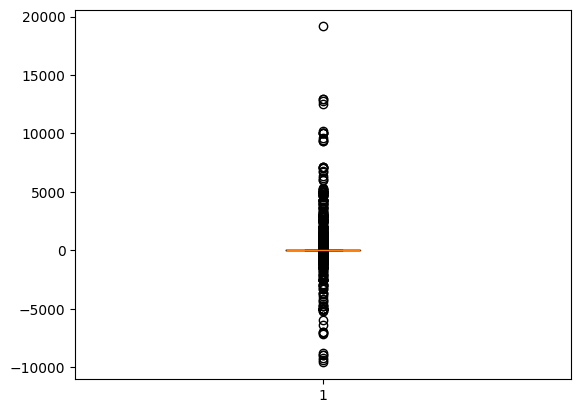

In [ ]:
plt.boxplot(df["Quantity"])

Se podría quitar el dato del valor máximo

In [ ]:
df["Quantity"].max()

19152

Es aceptable tener esa cantidad a esos precios, son datos válidos

In [ ]:
df[df["Quantity"] >= 5000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
7303,490018,21967,PACK OF 12 SKULL TISSUES,5184,2009-12-03 12:31:00,0.25,17940.0,United Kingdom
65077,495194,37410,BLACK AND WHITE PAISLEY FLOWER MUG,6012,2010-01-21 15:11:00,0.10,13902.0,Denmark
65079,495194,16044,POP-ART FLUORESCENT PENS,6144,2010-01-21 15:11:00,0.06,13902.0,Denmark
65085,495194,20759,CHRYSANTHEMUM POCKET BOOK,5280,2010-01-21 15:11:00,0.10,13902.0,Denmark
65088,495194,20756,GREEN FERN POCKET BOOK,5280,2010-01-21 15:11:00,0.10,13902.0,Denmark
65090,495194,20991,JAZZ HEARTS MAGNETIC MEMO PAD,6768,2010-01-21 15:11:00,0.10,13902.0,Denmark
65091,495194,20993,JAZZ HEARTS MEMO PAD,9312,2010-01-21 15:11:00,0.10,13902.0,Denmark
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
90866,497946,47503E,ASS FLORAL PRINT SCISSORS,6696,2010-02-15 11:57:00,0.15,13902.0,Denmark
93677,498152,85220,SMALL FAIRY CAKE FRIDGE MAGNETS,9456,2010-02-17 10:51:00,0.30,13902.0,Denmark


In [ ]:
df["Quantity"].min()

-9600

Hay algunas transacciones con cantidad negativa sin que sean cancelaciones, al parecer las transacciones sin cancelación no tiene un ID

In [ ]:
df[df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


## E. Inspeccionar Parámetro "Invoice"

Las cancelaciones no serán necesarias

In [ ]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

Se pueden eliminar estos datos (no relevantes)

In [ ]:
df[df["Invoice"].str.contains("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


## F. Inspeccionar Parámetro "StockCode"

In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
# df[df["StockCode"].str.match("^\\d{5}$") == False]["StockCode"].unique()
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

Transacciones válidas, no parece haber ninguna anomalía

In [ ]:
df[df["StockCode"].str.contains("^POST")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.0,France
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,12523.0,France
6406,489883,POST,POSTAGE,3,2009-12-02 16:24:00,18.00,12437.0,France
9103,C490117,POST,POSTAGE,-1,2009-12-03 17:38:00,2.99,16570.0,United Kingdom
9153,C490120,POST,POSTAGE,-2,2009-12-03 17:52:00,18.00,14277.0,France


Parece representar descuentos, no creo que sirvan

In [ ]:
df[df["StockCode"].str.contains("^D$")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
39127,C492693,D,Discount,-1,2009-12-17 18:47:00,6.85,13408.0,United Kingdom
44782,C493373,D,Discount,-1,2009-12-23 11:22:00,64.37,15044.0,United Kingdom
62231,C494909,D,Discount,-30,2010-01-19 16:45:00,0.40,12931.0,United Kingdom
62232,C494909,D,Discount,-30,2010-01-19 16:45:00,0.13,12931.0,United Kingdom
62962,C494984,D,Discount,-1,2010-01-20 11:12:00,70.00,17949.0,United Kingdom


No parecen ser datos importantes

In [ ]:
df[df["StockCode"].str.contains("^DCGS[0-9]{4}$")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
20324,491043,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-09 09:51:00,16.48,NaN,United Kingdom


No tienen asociados ningún comprador, parecen datos por error

In [ ]:
df[df["StockCode"].str.contains("^DOT")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
2644,489604,DOT,DOTCOM POSTAGE,1,2009-12-01 14:47:00,50.87,NaN,United Kingdom
2686,489607,DOT,DOTCOM POSTAGE,1,2009-12-01 14:49:00,76.30,NaN,United Kingdom
2698,489609,DOT,DOTCOM POSTAGE,1,2009-12-01 14:50:00,74.61,NaN,United Kingdom
2771,489612,DOT,DOTCOM POSTAGE,1,2009-12-01 14:55:00,87.39,NaN,United Kingdom
2806,489614,DOT,DOTCOM POSTAGE,1,2009-12-01 14:56:00,80.30,NaN,United Kingdom


Son transacciones válidas, pero son datos manuales

In [ ]:
df[df["StockCode"].str.contains("^M$")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.0,United Kingdom
17273,C490748,M,Manual,-1,2009-12-07 18:14:00,309.73,12748.0,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.0,United Kingdom


Parecen transacciones válidas, son pocos datos

In [ ]:
df[df["StockCode"].str.contains("^C2$")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.0,14156.0,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.0,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.0,14911.0,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.0,16253.0,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.0,14911.0,EIRE
27494,491702,C2,CARRIAGE,1,2009-12-13 13:53:00,50.0,NaN,EIRE
32207,491990,C2,NaN,100,2009-12-15 10:06:00,0.0,NaN,United Kingdom
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.0,14156.0,EIRE
34330,492250,C2,CARRIAGE,1,2009-12-16 10:45:00,50.0,18286.0,United Kingdom
39877,492746,C2,CARRIAGE,1,2009-12-18 13:01:00,50.0,NaN,EIRE


Se pueden eliminar este dato (no se sabe el significado de la transacción)

In [ ]:
df[df["StockCode"].str.contains("^C3$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.0,NaN,United Kingdom


No parecen importantes

In [ ]:
df[df["StockCode"].str.contains("^BANK CHARGES$")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
104220,C499374,BANK CHARGES,Bank Charges,-1,2010-02-26 11:55:00,467.54,NaN,United Kingdom
114180,C500319,BANK CHARGES,Bank Charges,-11,2010-03-07 12:02:00,0.96,NaN,United Kingdom
115208,C500352,BANK CHARGES,Bank Charges,-1,2010-03-07 15:08:00,11.29,NaN,United Kingdom
118558,C500708,BANK CHARGES,Bank Charges,-1,2010-03-09 13:56:00,372.30,NaN,United Kingdom
136411,C502459,BANK CHARGES,Bank Charges,-1,2010-03-24 14:25:00,39.24,NaN,United Kingdom


Son datos de prueba, no son importantes

In [ ]:
df[df["StockCode"].str.contains("^TEST")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.0,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom


Parecen ser regalos, no creo que sean necesarios

In [ ]:
df[df["StockCode"].str.contains("^gift")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
45212,493404,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2009-12-23 15:30:00,26.08,NaN,United Kingdom
45213,493404,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-23 15:30:00,17.39,NaN,United Kingdom
54564,494380,gift_0001_30,NaN,5,2010-01-13 17:39:00,0.00,NaN,United Kingdom
54636,494381,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-13 17:44:00,25.53,NaN,United Kingdom


Parecen importantes, a pesar de ser pocos datos

In [ ]:
df[df["StockCode"].str.contains("^PADS")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


Parecen ser cambios por personas dentro de la empresa, parecen no importantes

In [ ]:
df[df["StockCode"].str.contains("^ADJUST")].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.0,Spain
70981,C495740,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,14.00,13054.0,United Kingdom
70982,C495738,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,26.25,12454.0,Spain
70983,C495739,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,10.50,15383.0,United Kingdom
70984,C495744,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,91.89,12706.0,Finland


Se pueden eliminar este dato (no relevante)

In [ ]:
df[df["StockCode"].str.contains("^GIFT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.0,NaN,United Kingdom


Se pueden eliminar estos datos (datos manuales)

In [ ]:
df[df["StockCode"].str.contains("^m")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
96608,498492,m,Manual,1,2010-02-19 10:56:00,2.55,NaN,United Kingdom
96609,498492,m,Manual,1,2010-02-19 10:56:00,3.40,NaN,United Kingdom
157226,504396,m,Manual,1,2010-04-13 11:45:00,4.00,NaN,United Kingdom
228780,511509,m,Manual,1,2010-06-08 15:26:00,2.55,NaN,United Kingdom


Se pueden eliminar estos datos (no relevantes)

In [ ]:
df[df["StockCode"].str.contains("^S")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom


Se pueden eliminar estos datos (no relevantes)

In [ ]:
df[df["StockCode"].str.contains("^B$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Se pueden eliminar estos datos (no relevantes)

In [ ]:
df[df["StockCode"].str.contains("^AMAZONFEE")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


Parece un dato de compra válido

In [ ]:
df[df["StockCode"].str.contains("^47503J ")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
260886,514532,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2010-07-05 10:07:00,16.13,NaN,United Kingdom


Resumen y decisión sobre los datos

| Código | Descripción | Acción |
|-----------|-----------|-----------|
| XXXXX | Son transacciones válidas | Incluir |
| POST | Parecen transacciones normales | Incluir |
| D | Parecen transacciones normales, representan descuentos | Excluir |
| DOT | Todos los usuarios son NULL | Excluir |
| M - m | Son transacciones válidas, pero son datos manuales | Excluir |
| C2 - C3 | Parecen transacciones válidas, pero no sé el significado completo | Excluir |
| PADS | Parecen transacciones válidas | Incluir |
| BANK CHARGES - B | Transacciones relacionadas con el banco, no relevantes | Excluir |
| TESTXXX | Parecen transacciones de prueba | Excluir |
| gift_XXX_XX | Parecen regalos, no relevantes | Excluir |
| ADJUSTX | Parecen cambios hechos por administradores, no relevantes | Excluir |
| GIFT | Solo es 1 dato, no es relevante | Excluir |
| AMAZONFEE | Parecen tarifas de Amazon | Excluir |
| S | Parecen muestras enviadas | Excluir |
| SP1002 | Solo hay 3 datos, no tan relevantes | Excluir |
| DCGSXXXX | No tienen asociados un id de comprador | Excluir |

## G. Explorar Parámetro "Country"

No parece haber ninguna anomalía, son nombres de paises válidos

In [ ]:
df["Country"] = df["Country"].astype("str")
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

## H. Explorar Parámetro "Price"

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1629230970>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1629230430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1629230c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7c16294dc160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c16294dc400>],
 'means': []}

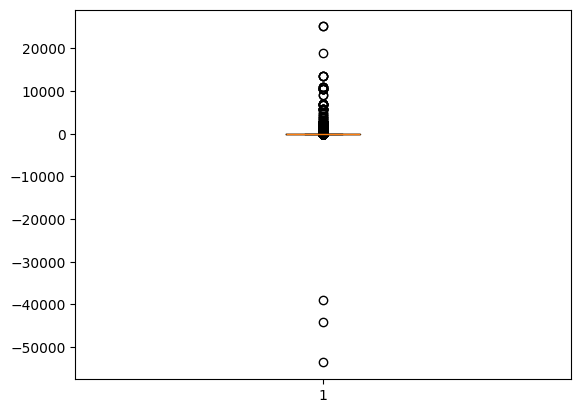

In [ ]:
plt.boxplot(df["Price"])

Son los mismos datos que ya se decidieron borrar

In [ ]:
df[df["Price"] >= 16000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom


También son los mismos datos que ya se decidieron borrar

In [ ]:
df[(df["Price"] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Estos datos se pueden eliminar, no creo que sean relevantes

In [ ]:
df[(df["Price"] == 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


# **3. Limpieza de Datos**

---

In [ ]:
cleaned_df = df.copy()

## A. Limpiar Parámetro "Invoice"

In [ ]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}") == True
    )
cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## B. Limpiar Parámetro "StockCode"

In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^POST$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True)
    )
cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## C. Limpiar Parámetro "Customer ID"

In [ ]:
cleaned_df.dropna(subset = "Customer ID", inplace = True)

## D. Limpiar Parámetro "Price"

In [ ]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407047.000000,407047,407047.000000,407047.000000
mean,13.598668,2010-07-01 10:31:35.615837952,3.035292,15368.847136
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13996.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,850.000000,18287.000000
std,96.911969,NaN,4.808873,1679.826458


OJO con esto

{'whiskers': [<matplotlib.lines.Line2D at 0x7c161f8900a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c161f8904c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c162136c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c161f890a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c161f890ca0>],
 'means': []}

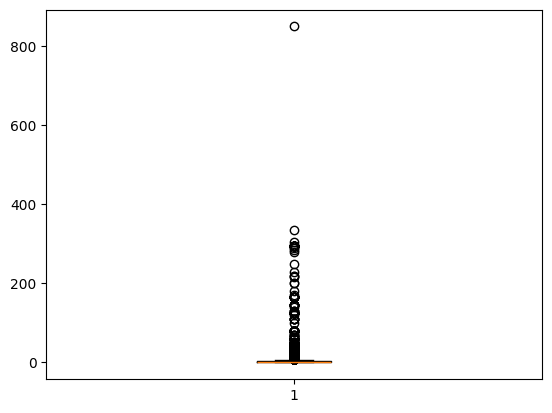

In [ ]:
plt.boxplot(cleaned_df["Price"])

In [ ]:
cleaned_df[cleaned_df["Price"] >= 600]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
464322,533162,POST,POSTAGE,1,2010-11-16 14:29:00,850.0,12357.0,Switzerland


## E. Contabilizar Datos Limpiados

In [ ]:
print("Se limpiaron {} registros, lo cual representa que se eliminó el {}% de los registros.".format(len(df) - len(cleaned_df), round((1 - len(cleaned_df)/len(df)) * 100, 4)))

Se limpiaron 118414 registros, lo cual representa que se eliminó el 22.5353% de los registros.


# **4. Reducción de Dimensionalidad**

---

## A. Crear Nuevo Parámetro

Agregar nueva columna con el precio total a pagar por el comprador

In [ ]:
cleaned_df["Total"] = cleaned_df["Price"] * cleaned_df["Quantity"]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


## B. Obtener Características Importantes

In [ ]:
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False).agg(
    MonetaryValue = ("Total", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastDate = ("InvoiceDate", "max")
)
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2671.14,3,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4282,18283.0,641.77,6,2010-11-22 15:30:00
4283,18284.0,411.68,1,2010-10-04 11:33:00
4284,18285.0,377.00,1,2010-02-17 10:24:00
4285,18286.0,1246.43,2,2010-08-20 11:57:00


Se toma la fecha más reciente como si fuera la fecha actual, puesto que este dataset es antiguo

In [ ]:
max_invoice_date = aggregated_df["LastDate"].max()
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastDate"]).dt.days
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73
3,12349.0,2671.14,3,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,343.80,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,488.21,1,2010-05-21 11:59:00,202
8,12356.0,3562.25,3,2010-11-24 12:24:00,15
9,12357.0,12079.99,2,2010-11-16 14:29:00,23


## C. Gráficos de Barras

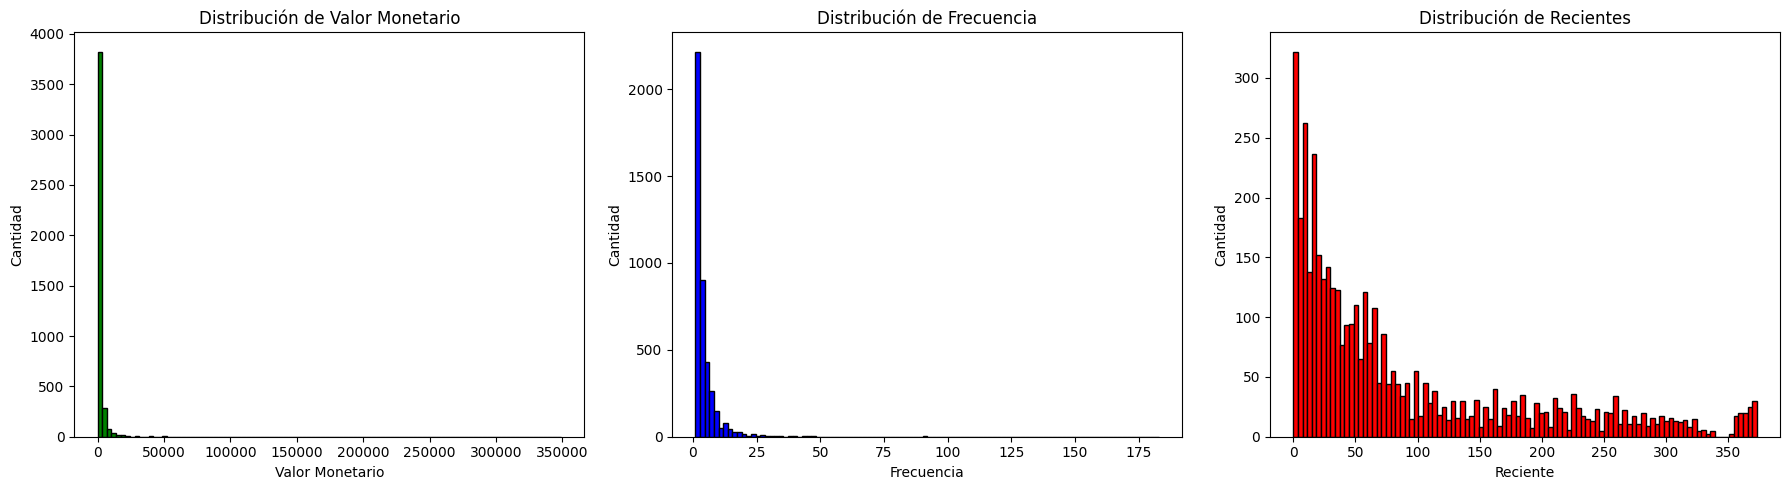

In [ ]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins = 100, color = "green", edgecolor = "black")
plt.title("Distribución de Valor Monetario")
plt.xlabel("Valor Monetario")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins = 100, color = "blue", edgecolor = "black")
plt.title("Distribución de Frecuencia")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins = 100, color = "red", edgecolor = "black")
plt.title("Distribución de Recientes")
plt.xlabel("Reciente")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

## D. Diagramas de Cajas

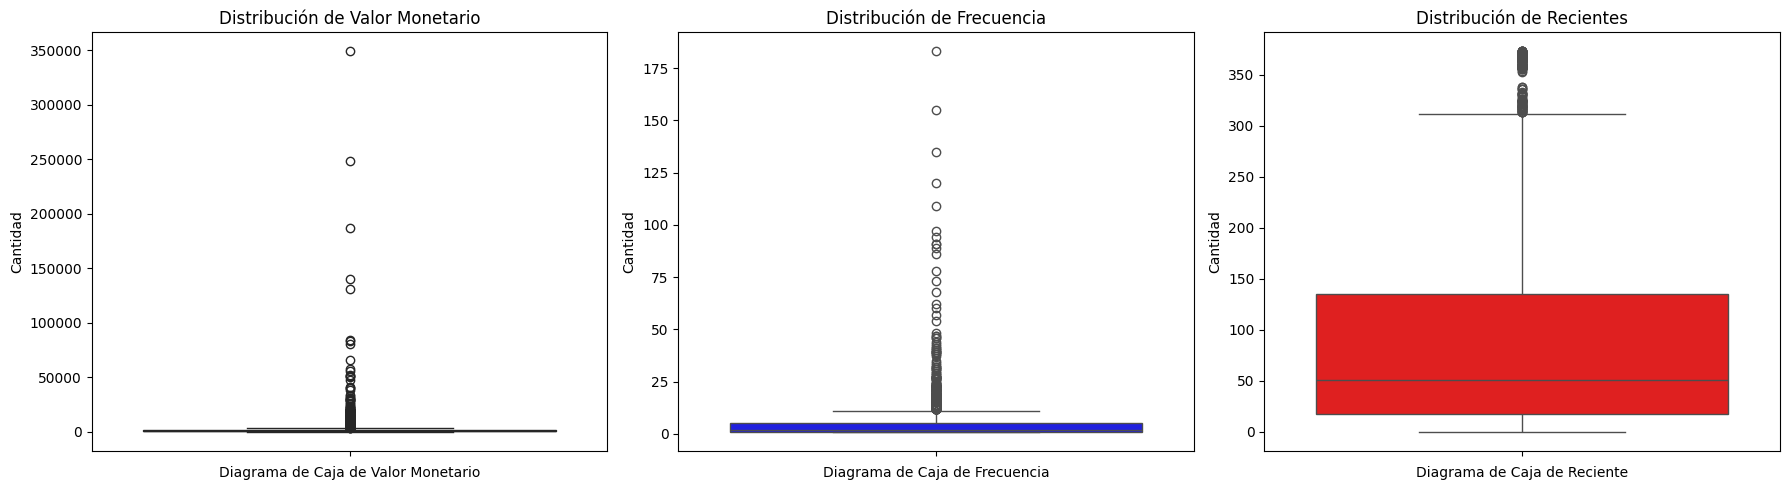

In [ ]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df["MonetaryValue"], color = "green")
plt.title("Distribución de Valor Monetario")
plt.xlabel("Diagrama de Caja de Valor Monetario")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_df["Frequency"], color = "blue")
plt.title("Distribución de Frecuencia")
plt.xlabel("Diagrama de Caja de Frecuencia")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_df["Recency"], color = "red")
plt.title("Distribución de Recientes")
plt.xlabel("Diagrama de Caja de Reciente")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

## E. Obtener Datos Atípicos

In [ ]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastDate,Recency
count,420.000000,420.00000,420.000000,420,420.000000
mean,15080.669048,12300.87230,17.285714,2010-11-09 16:32:02.285714432,29.864286
min,12357.000000,3851.01000,1.000000,2009-12-10 18:03:00,0.000000
25%,13596.750000,4615.45500,8.000000,2010-11-08 15:20:00,3.000000
50%,14927.000000,6279.99500,12.000000,2010-11-26 13:17:30,13.000000
75%,16673.500000,10398.63250,18.000000,2010-12-06 11:11:00,31.000000
max,18260.000000,349164.35000,183.000000,2010-12-09 19:32:00,364.000000
std,1729.090619,25927.88599,19.824150,NaN,51.638806


In [ ]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastDate,Recency
count,283.000000,283.000000,283.000000,283,283.000000
mean,15311.639576,14326.010622,23.703180,2010-11-23 09:40:01.272084480,16.148410
min,12422.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13741.000000,4331.560500,13.000000,2010-11-19 15:09:00,2.000000
50%,15311.000000,6615.770000,17.000000,2010-12-02 08:52:00,7.000000
75%,16798.000000,11680.485000,23.000000,2010-12-07 10:29:30,20.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1769.580015,31197.852198,21.900247,NaN,26.430946


In [ ]:
R_Q1 = aggregated_df["Recency"].quantile(0.25)
R_Q3 = aggregated_df["Recency"].quantile(0.75)
R_IQR = R_Q3 - R_Q1

recency_outliers_df = aggregated_df[(aggregated_df["Recency"] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_df["Recency"] < (R_Q1 - 1.5 * R_IQR))].copy()
recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastDate,Recency
count,169.00000,169.000000,169.000000,169,169.000000
mean,15394.35503,416.640538,1.248521,2009-12-23 07:34:49.704142080,351.230769
min,12362.00000,2.950000,1.000000,2009-12-01 09:55:00,314.000000
25%,14106.00000,145.060000,1.000000,2009-12-07 11:41:00,329.000000
50%,15409.00000,231.320000,1.000000,2009-12-14 13:30:00,360.000000
75%,16802.00000,352.850000,1.000000,2010-01-14 08:30:00,367.000000
max,18201.00000,9471.500000,7.000000,2010-01-29 14:22:00,373.000000
std,1651.05019,946.321118,0.792683,NaN,20.530175


## F. Quitar Datos Atípicos

In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(recency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastDate,Recency
count,3646.000000,3646.000000,3646.000000,3646,3646.000000
mean,15376.357652,919.666979,2.943225,2010-09-14 22:46:24.602304,85.603401
min,12346.000000,1.550000,1.000000,2010-01-31 12:19:00,0.000000
25%,13903.750000,296.520000,1.000000,2010-08-02 14:05:30,21.000000
50%,15390.500000,620.790000,2.000000,2010-10-15 12:29:00,55.000000
75%,16855.500000,1319.662500,4.000000,2010-11-18 12:41:00,129.000000
max,18287.000000,3817.180000,11.000000,2010-12-09 20:01:00,312.000000
std,1694.547235,832.705808,2.259639,NaN,83.641157


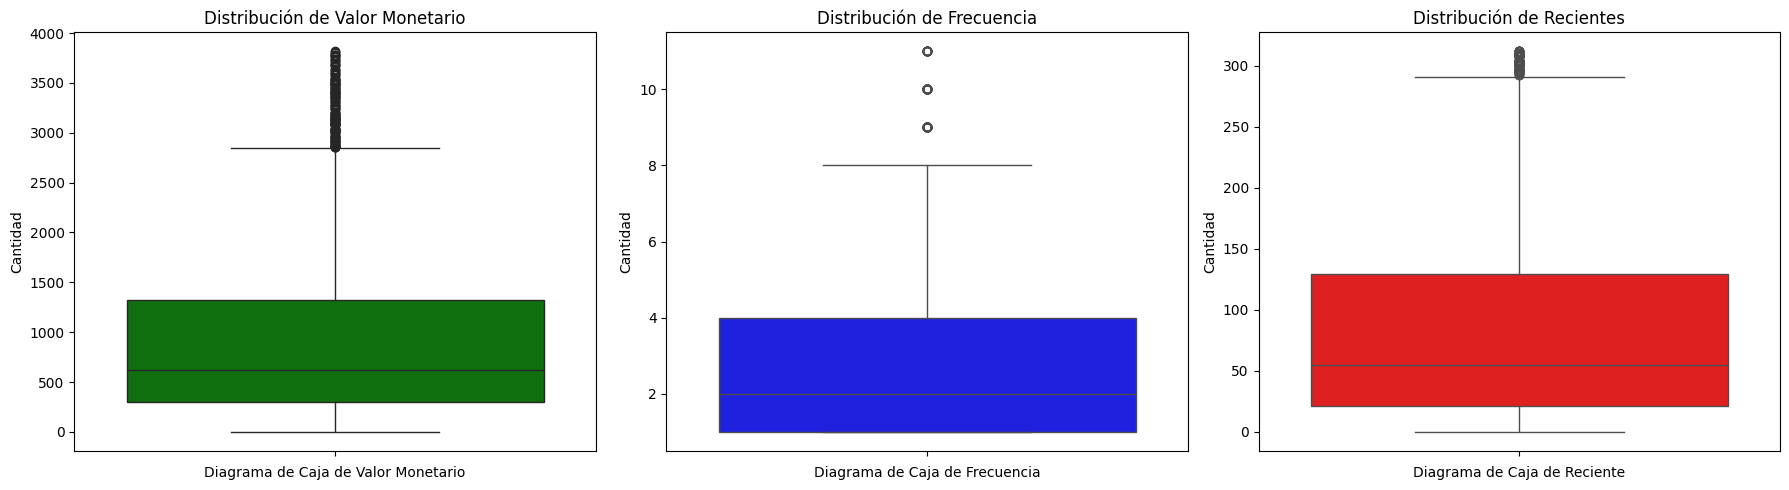

In [ ]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df["MonetaryValue"], color = "green")
plt.title("Distribución de Valor Monetario")
plt.xlabel("Diagrama de Caja de Valor Monetario")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers_df["Frequency"], color = "blue")
plt.title("Distribución de Frecuencia")
plt.xlabel("Diagrama de Caja de Frecuencia")
plt.ylabel("Cantidad")

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers_df["Recency"], color = "red")
plt.title("Distribución de Recientes")
plt.xlabel("Diagrama de Caja de Reciente")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

## G. Visualizar los Nuevos Datos

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = non_outliers_df["MonetaryValue"],
    y = non_outliers_df["Frequency"],
    z = non_outliers_df["Recency"],
    mode = 'markers',
    marker = dict(size = 2, color='purple', opacity=0.8) ))

fig.update_layout(
    scene = dict(
        xaxis_title = "Valor Monetario",
        yaxis_title = "Frecuencia",
        zaxis_title = "Reciente" ),
    title = "Gráfico de Dispersión 3D para Datos del Cliente")

# **5. Normalización de Datos**

---

## A. Normalización Z-Score

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.90117048, -0.41748041,  0.93742548],
       [ 0.48481515, -0.41748041, -0.99968569],
       [-0.83775404, -0.86008976, -0.15070487],
       ...,
       [-0.65178051, -0.86008976,  2.50385489],
       [ 0.39246495, -0.41748041,  0.30367923],
       [ 1.65272267,  0.4677383 , -0.82032355]])

## B. Convertir a DataFrame

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns = ("MonetaryValue", "Frequency", "Recency"), index = non_outliers_df.index)
scaled_data_df.head(10)

,MonetaryValue,Frequency,Recency
0,-0.901170,-0.417480,0.937425
1,0.484815,-0.417480,-0.999686
2,-0.837754,-0.860090,-0.150705
3,2.103640,0.025129,-0.521387
4,-0.743146,-0.860090,-0.904026
5,-0.691656,-0.417480,-0.904026
6,-0.722932,-0.860090,-0.509429
7,-0.518210,-0.860090,1.391810
8,3.173925,0.025129,-0.844239
10,2.161135,0.025129,-0.904026


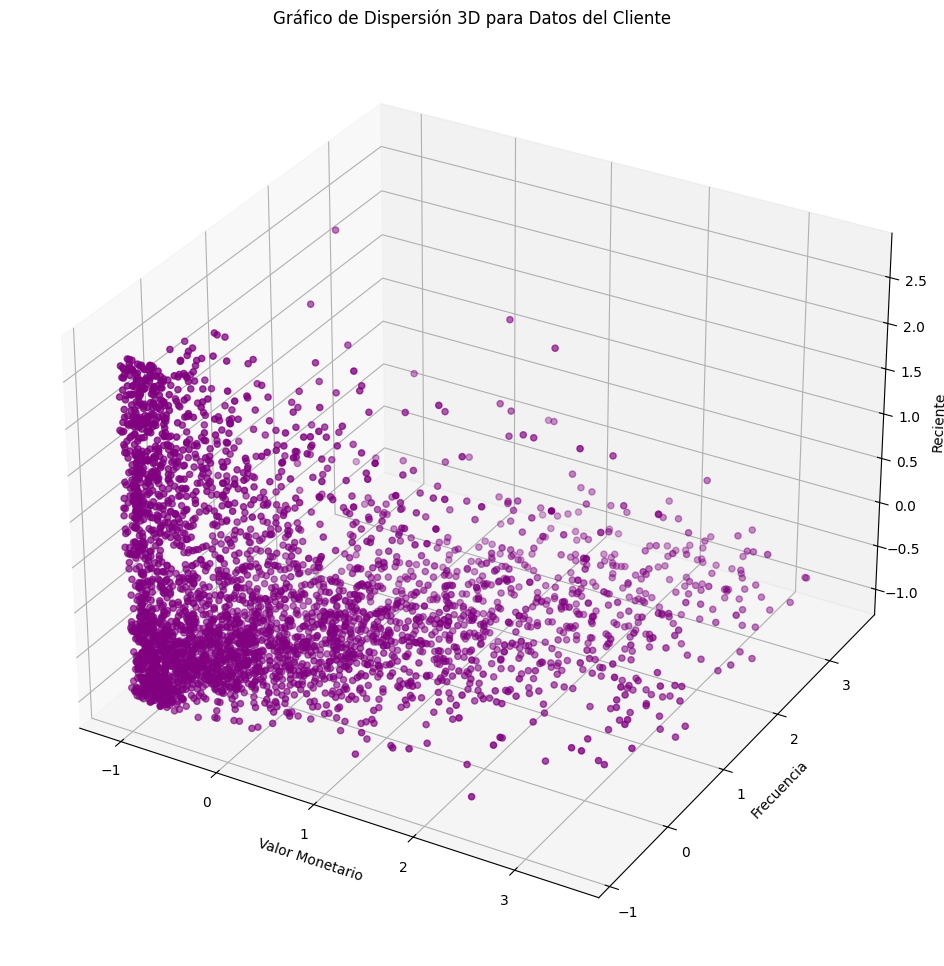

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"], c = "purple")
ax.set_xlabel("Valor Monetario")
ax.set_ylabel("Frecuencia")
ax.set_zlabel("Reciente")
ax.set_title("Gráfico de Dispersión 3D para Datos del Cliente")
plt.show()

# **6. Implementación de KMeans**

---

## A. Implementar Métrica "Coeficiente de Silueta"

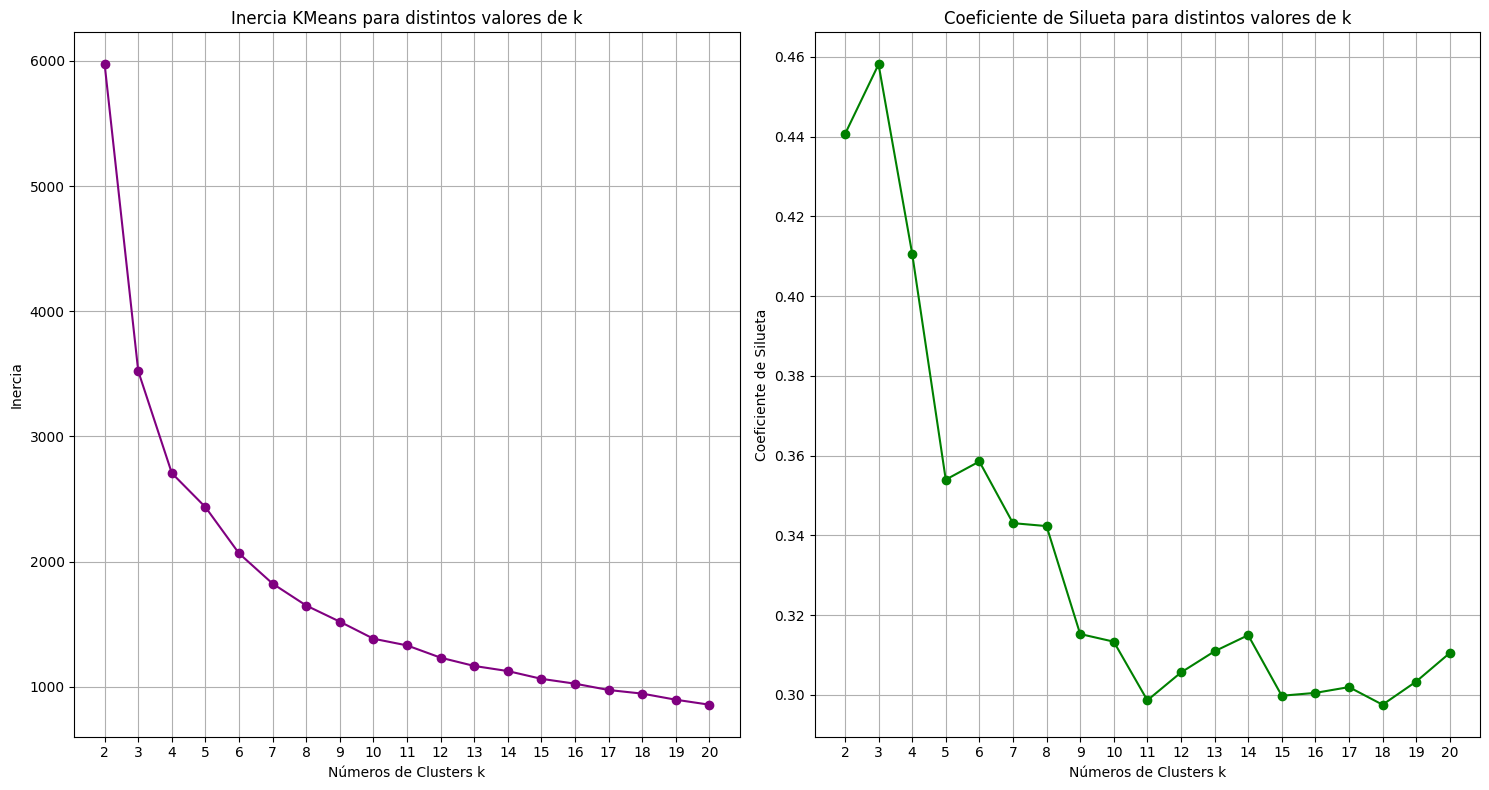

In [ ]:
max_k = 20
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
  kmeans = KMeans(n_clusters = k, random_state = 50, max_iter = 1000)
  cluster_labels = kmeans.fit_predict(scaled_data_df)
  sil_score = silhouette_score(scaled_data_df, cluster_labels)
  silhouette_scores.append(sil_score)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = "o", color = "purple")
plt.title("Inercia KMeans para distintos valores de k")
plt.xlabel("Números de Clusters k")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker = "o", color = "green")
plt.title("Coeficiente de Silueta para distintos valores de k")
plt.xlabel("Números de Clusters k")
plt.ylabel("Coeficiente de Silueta")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

## B. Designar los Clusters a los Datos

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 50, max_iter = 1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 3, 0, ..., 1, 3, 3], dtype=int32)

In [ ]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

<ipython-input-182-27c1cd6acdfb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,MonetaryValue,Frequency,LastDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,222.16,1,2010-09-27 14:59:00,73,0
3,12349.0,2671.14,3,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4282,18283.0,641.77,6,2010-11-22 15:30:00,17,3
4283,18284.0,411.68,1,2010-10-04 11:33:00,66,0
4284,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4285,18286.0,1246.43,2,2010-08-20 11:57:00,111,3


## C. Visualizar los Grupos Creados

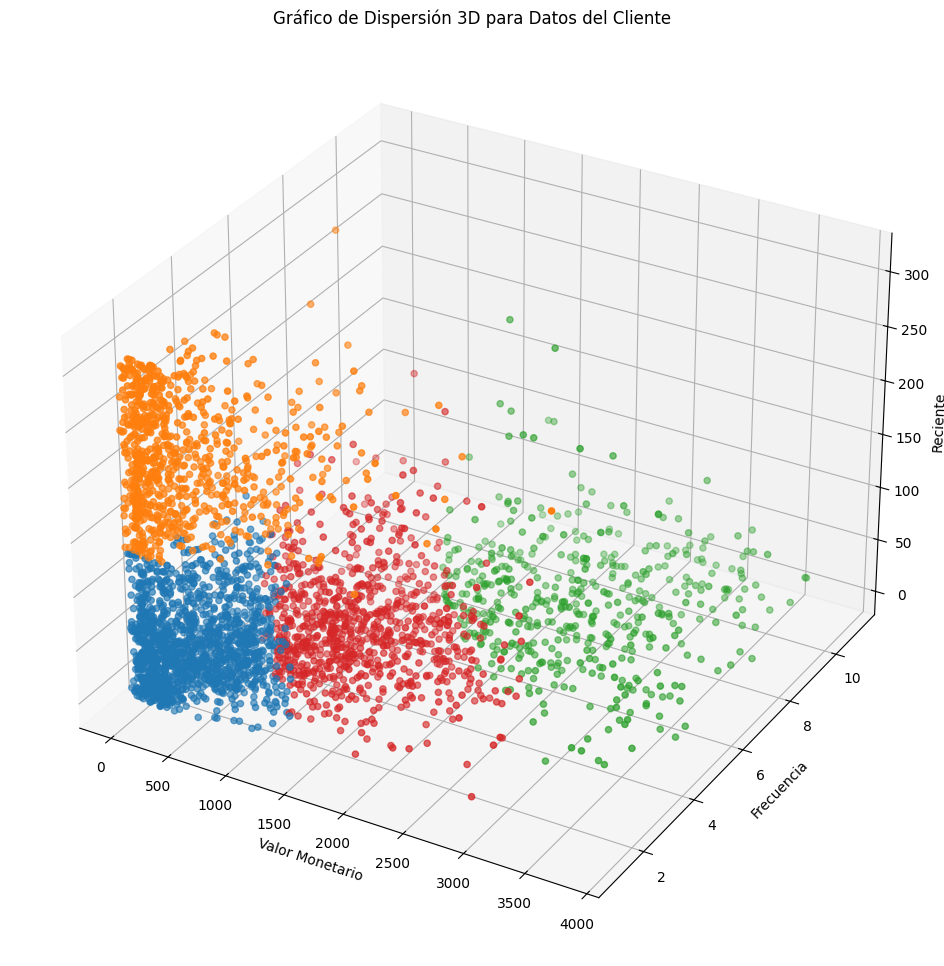

In [ ]:
clusters_color = {0 : "#1F77B4", #Azul
                  1 : "#FF7F0E", #Naranja
                  2 : "#2CA02C", #Verde
                  3 : "#D62728", #Rojo
                  4 : "#FFFF00", #Amarillo
                  5 : "#592D83", #Morado
                  6 : "#24B9D3", #Celeste
                  7 : "#2F4F06", #Verde Oscuro
                  8 : "#5C4A0B", #Marrón
                  9 : "#A729D6"} #Rosado

colors = non_outliers_df["Cluster"].map(clusters_color)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c = colors,
                     marker = "o")

ax.set_xlabel("Valor Monetario")
ax.set_ylabel("Frecuencia")
ax.set_zlabel("Reciente")
ax.set_title("Gráfico de Dispersión 3D para Datos del Cliente")

plt.show()

# **7. Análisis de los Grupos Creados**

---

## A. Gráficos de Violines

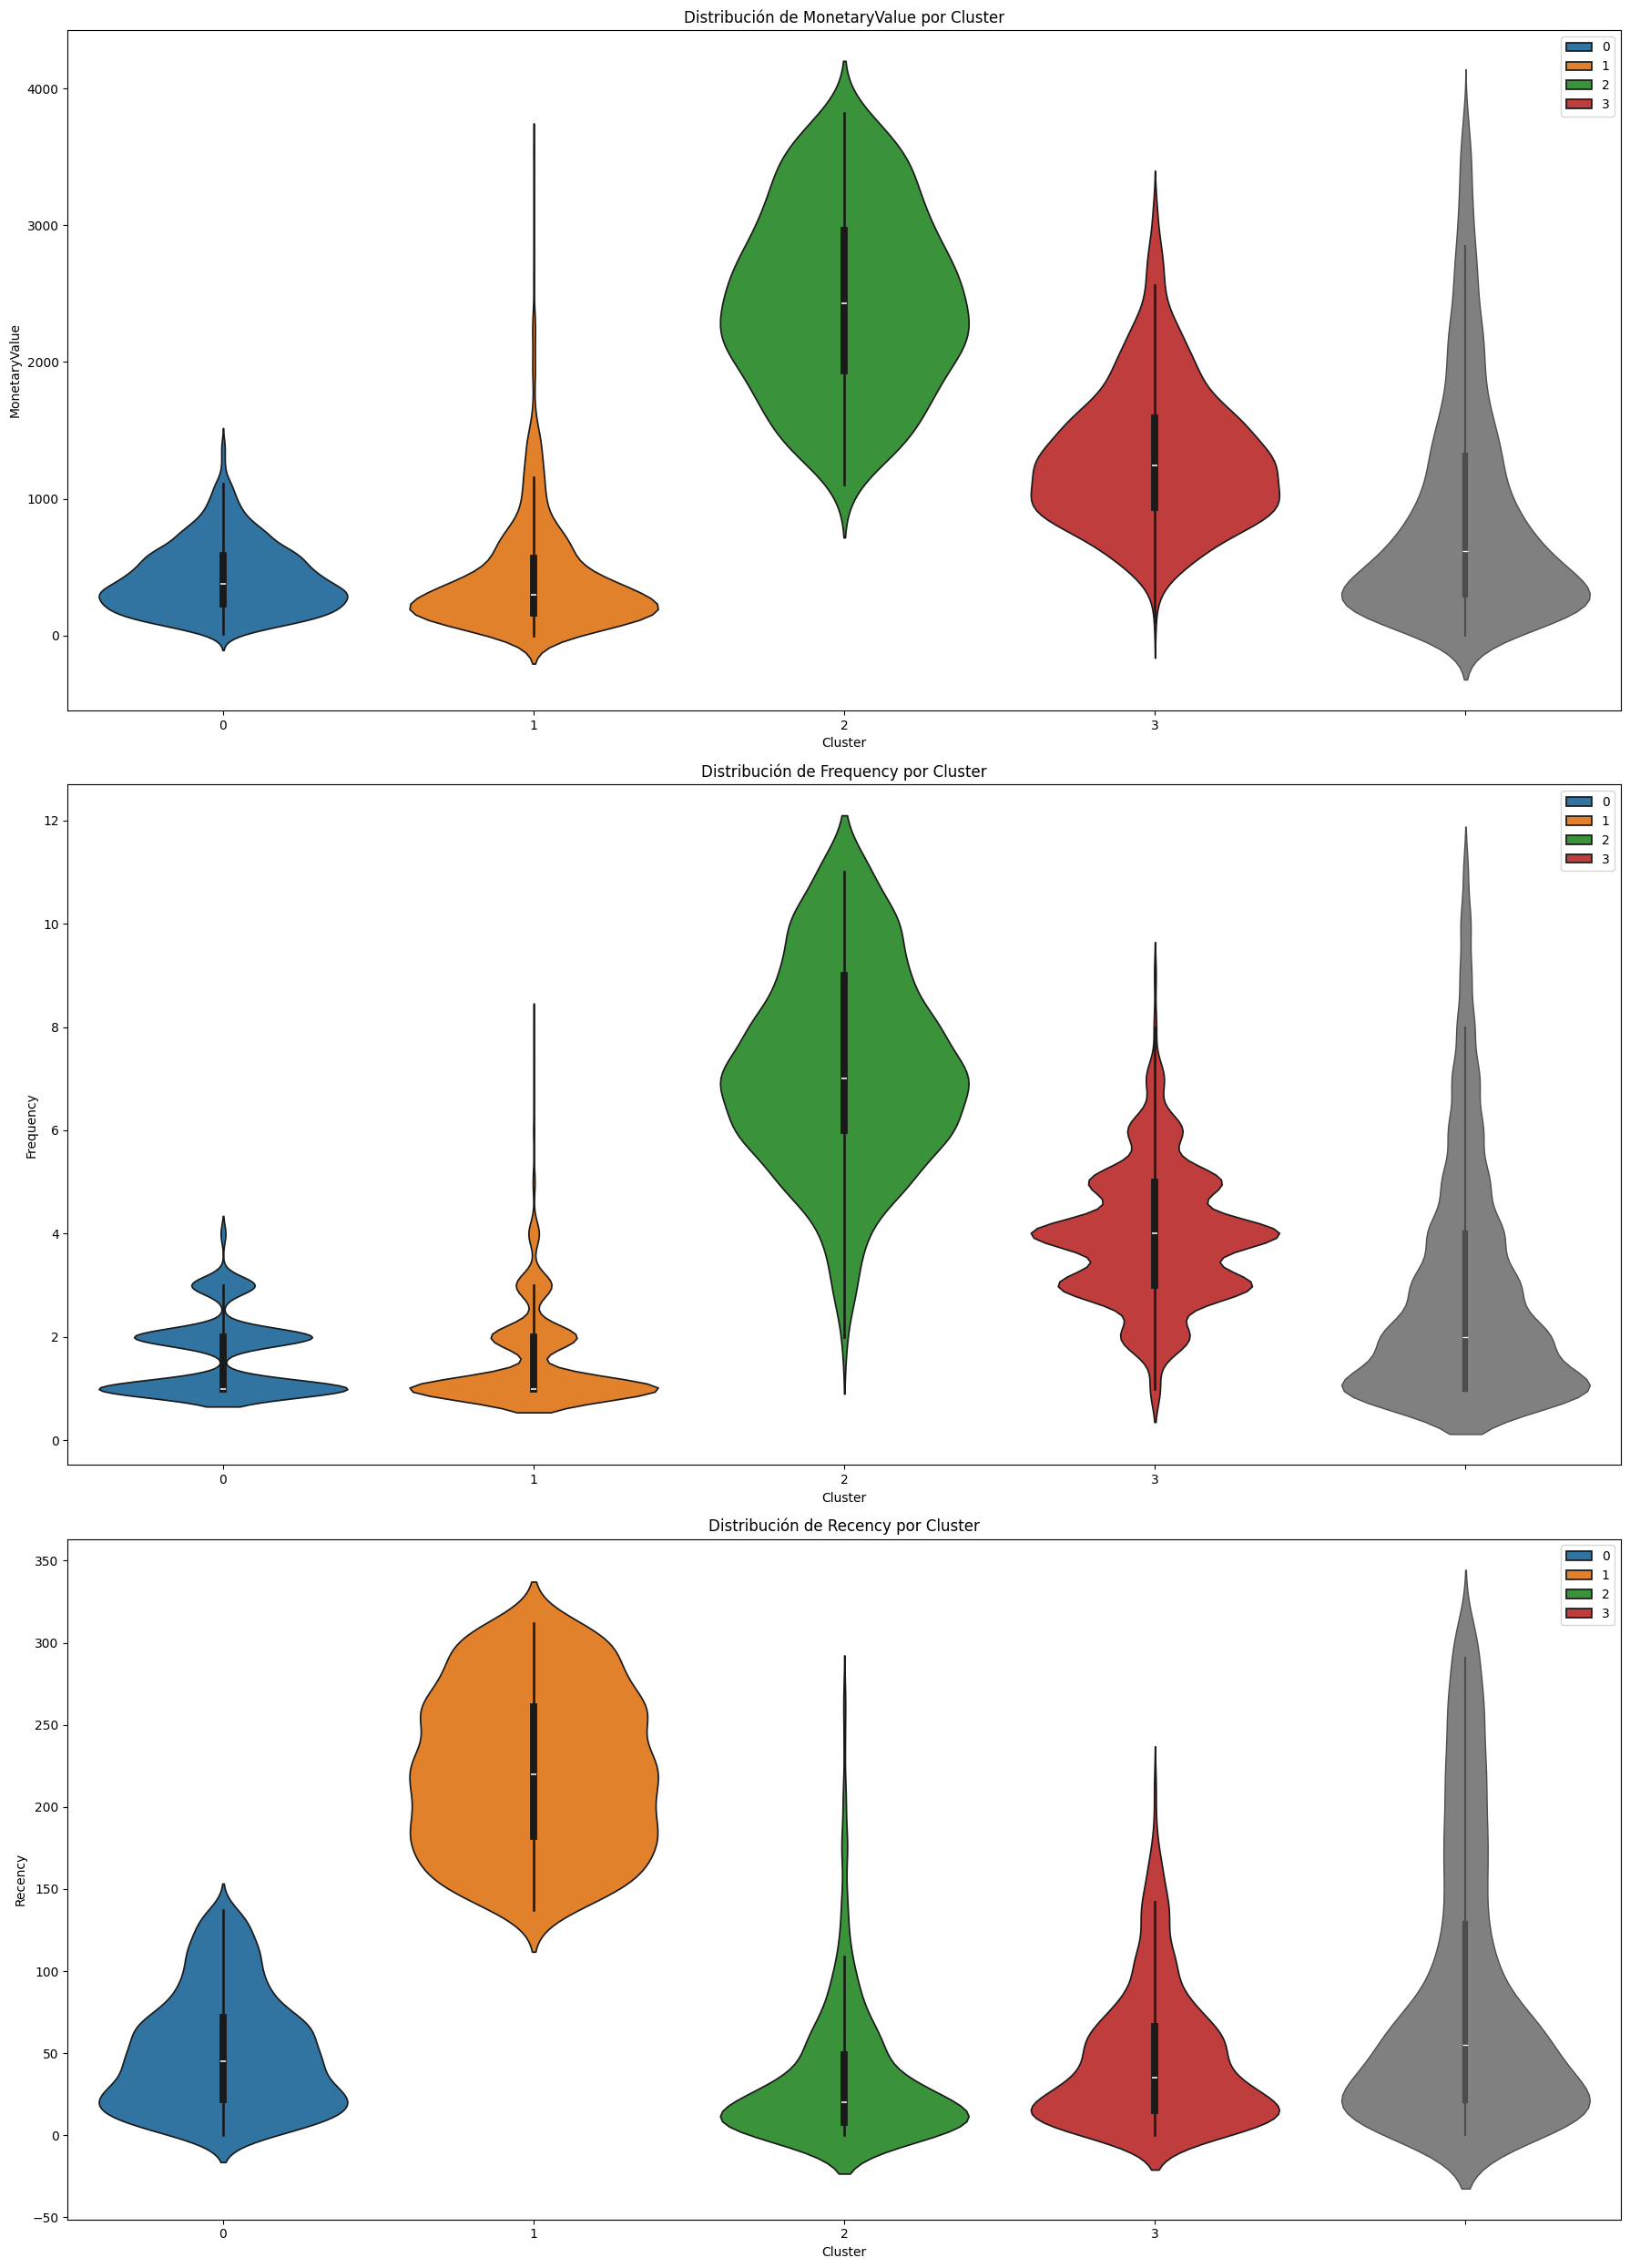

In [ ]:
plt.figure(figsize = (18, 25))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["MonetaryValue"], palette = clusters_color, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["MonetaryValue"], color = "gray", linewidth = 1.0)
plt.title("Distribución de MonetaryValue por Cluster")
plt.ylabel("MonetaryValue")

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["Frequency"], palette = clusters_color, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Frequency"], color = "gray", linewidth = 1.0)
plt.title("Distribución de Frequency por Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_df["Cluster"], y = non_outliers_df["Recency"], palette = clusters_color, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df["Recency"], color = "gray", linewidth = 1.0)
plt.title("Distribución de Recency por Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

## B. Descripción de los Clusters

Cluster 0 (Azul): "Incentivar"
1. La mayoría no gastan mucho dinero.
2. Están por debajo del promedio de cantidad de compras realizadas.
3. Su recientes compras están cerca del promedio.

- Fundamento: Este cluster representa a los clientes que menos dinero gastan y que también son los que menos compras realizaron, pero parece que son los que compran recientemente. Puede que sean nuevos clientes o necesiten incentivos para incrementar sus compras.
- Acción: Darles un excelente servicio al cliente e incentivos para fomentar las compras con más frecuencia.

Cluster 1 (Naranja): "Retomar"
1. La mayoría no gastan mucho dinero.
2. Están por debajo del promedio de cantidad de compras realizadas.
3. No son nada recientes en realizar sus últimas compras.

- Fundamento: Este cluster representa a los clientes que gastaban y frecuentaban sus compras de manera regular, pero ya no están realizando compras de recientemente.
- Acción: Lanzar anuncios, hacer campañas de marketing, realizar descuentos o dar regalos por nuevas compras para que puedan volver a ser clientes regulares.

Cluster 2 (Verde): "Premiar"
1. Todos gastan la mayor cantidad de dinero.
2. Son los que hacen la mayor cantidad de compras.
3. Son los más recientes en realizar sus compras.

- Fundamento: Este cluster representa a los clientes que gastan mucho dinero, compran en cantidades y están muy activos al realizar sus compras.
- Acción: Estos son los clientes más leales, deberíamos darles descuentos o promociones exclisuvas.

Cluster 3 (Rojo): "Mantener"
1. La mayoría gastan una cantidad de dinero más que el promedio.
2. Realizan una cantidad de compras por encima del promedio.
3. Son un poco más recientes en sus compras que el promedio.

- Fundamento: Este cluster representa a los clientes que realizan sus compras de manera regular, son clientes promedios.
- Acción: Debemos mantener a esos clientes leales, deberían de personalizar las ofertas y mantener un compromiso de manera regular para asegurarnos que permanezcan activos.